In [19]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [9]:
location = '/Users/achappa/devhak/cds/M3/other/CTA_-_Ridership_-_Daily_Boarding_Totals_20250403.csv'
path = Path(location)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   service_date    8828 non-null   datetime64[ns]
 1   day_type        8828 non-null   object        
 2   bus             8828 non-null   int64         
 3   rail_boardings  8828 non-null   int64         
 4   total_rides     8828 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 345.0+ KB


In [11]:
#shorter names
df = pd.read_csv(path,parse_dates=["service_date"])
df.columns = ["date","day_type","bus","rail","total"]
df = df.sort_values("date").set_index("date")
df.drop(columns=["total"], inplace=True)
df = df.drop_duplicates()
df.head()

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917


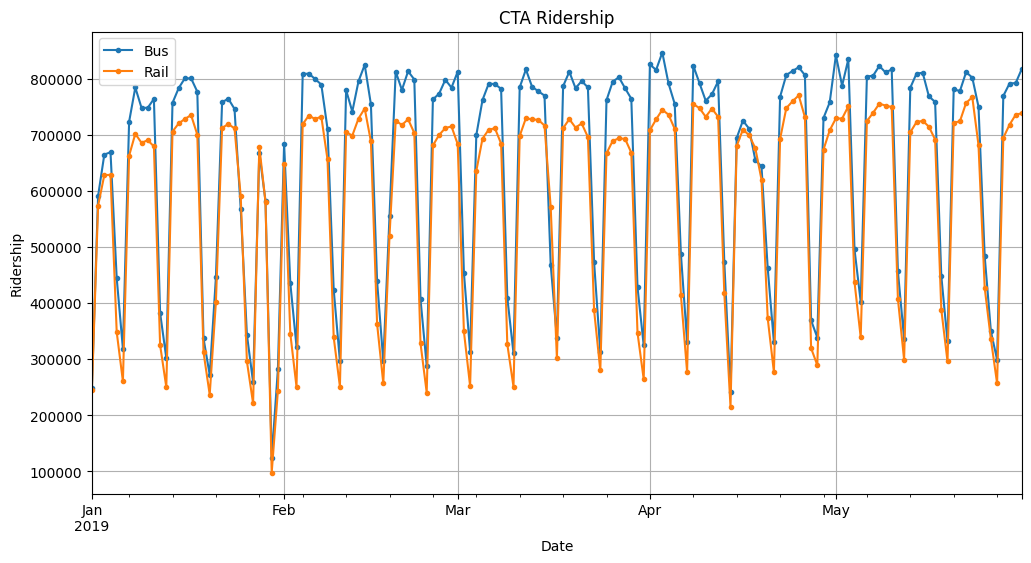

In [20]:
#plot ridership timeseries for a few months
#import matplotlib.pyplot as plt

df["2019-01":"2019-05"].plot(grid=True,marker=".",figsize=(12, 6), title="CTA Ridership")
plt.xlabel("Date")
plt.ylabel("Ridership")
plt.legend(["Bus","Rail"])
plt.savefig("cta_ridership.png", dpi=300)
plt.show()

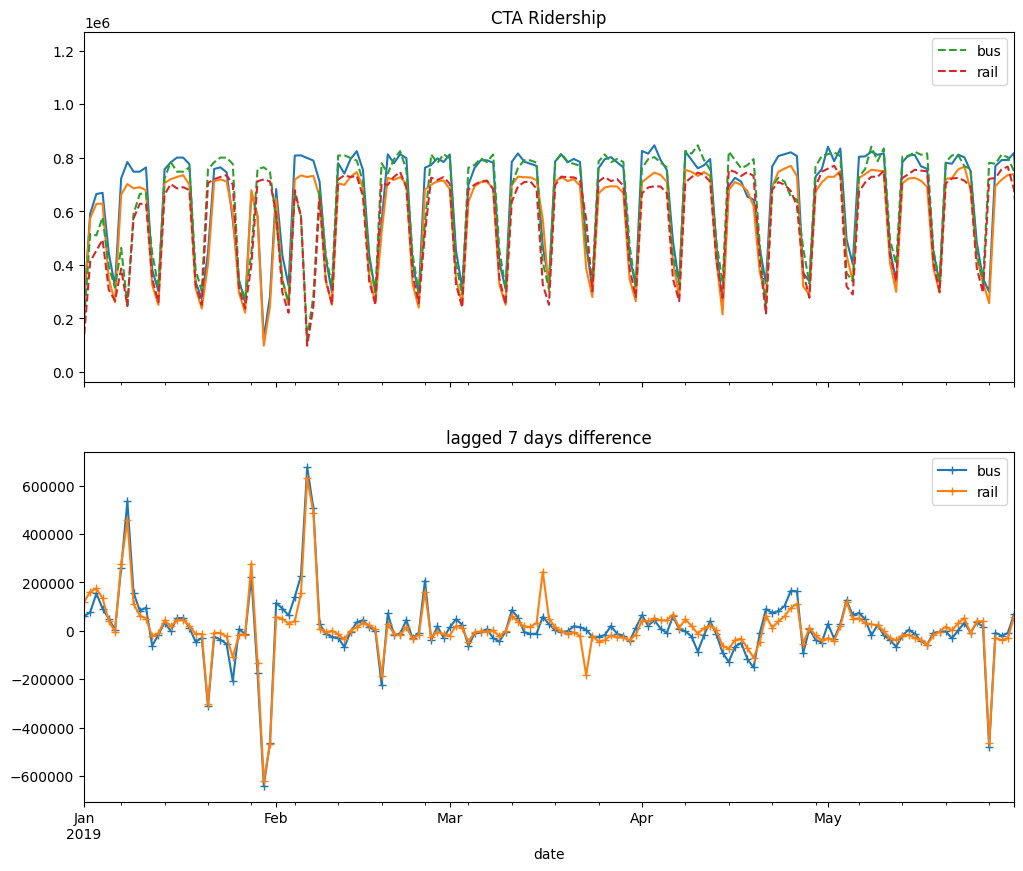

In [32]:
# apply differencing of 7 days

df_7 = df[["bus","rail"]].diff(7)["2019-01":"2019-05"]

fig,axs = plt.subplots(2,1,sharex=True,figsize=(12, 10))
df.plot(ax = axs[0],legend=False)
df.shift(7).plot(ax = axs[0],linestyle="--")
axs[0].set_title("CTA Ridership")


axs[1].set_title("lagged 7 days difference")
df_7.plot(ax = axs[1],marker="+")
plt.show()

In [38]:
list(df.loc["2019-02-05":"2019-02-10"]["day_type"])

['W', 'W', 'W', 'W', 'A', 'U']

In [48]:
print(df_7.abs().sum(axis=0).sort_values(ascending=False))
print(df_7.abs().mean(axis=0).sort_values(ascending=False))

targets = df[["bus","rail"]]["2019-01":"2019-05"]
print('MAPE:\n',(df_7/targets).abs().mean())

bus     10850082.0
rail     9787119.0
dtype: float64
bus     71854.847682
rail    64815.357616
dtype: float64
MAPE:
 bus     0.154756
rail    0.164662
dtype: float64


In [2]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

X = "I love India"
Y = "India is a beautiful country"

X_list = word_tokenize(X)
Y_list = word_tokenize(Y)

sw = stopwords.words('english')
l1= []; l2 = []

#remove stop words from string
X_set = {w for w in X_list if not w in sw}
Y_set = {w for w in Y_list if not w in sw}


ModuleNotFoundError: No module named 'nltk'